In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Data/salesdaily.csv")
data.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [4]:
data["datum"].dtype

dtype('O')

In [5]:
data['datum'] = pd.to_datetime(data['datum'])
data = data.set_index('datum')

In [6]:
data.shape

(2106, 12)

In [7]:
data.isnull().sum()

M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
dtype: int64

In [8]:
data.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,5.033683,3.895830,3.880441,29.917095,8.853627,0.593522,5.512262,2.900198,2016.401235,6.344255,275.945869
std,2.737579,2.133337,2.384010,15.590966,5.605605,1.092988,6.428736,2.415816,1.665060,3.386954,1.970547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,190.000000
25%,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,3.000000,276.000000
50%,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,6.000000,276.000000
75%,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,9.000000,276.000000
max,17.340000,14.463000,16.000000,161.000000,54.833333,9.000000,45.000000,15.000000,2019.000000,12.000000,276.000000


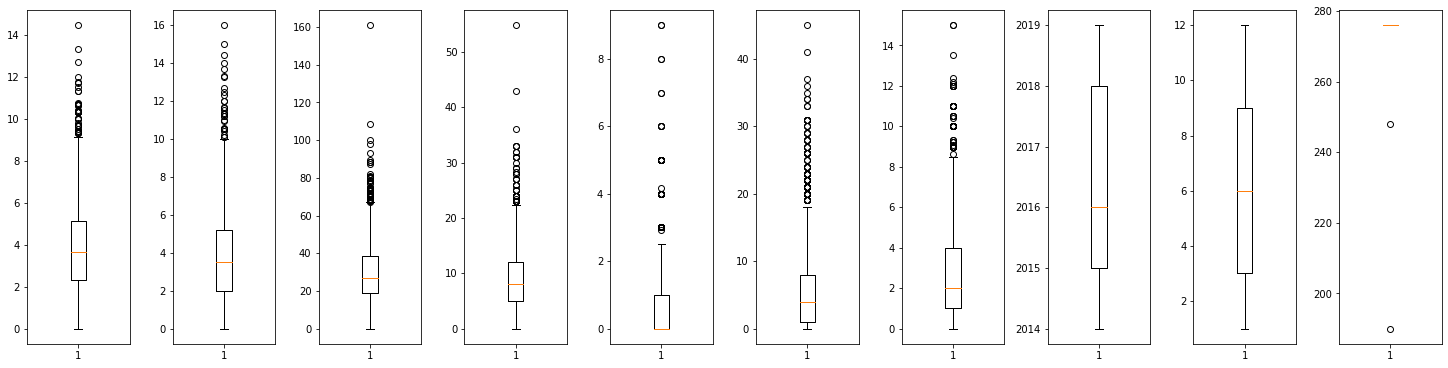

In [9]:
num = len(data.columns)
plt.figure(figsize=(2*num,10))
for category in range(1,num-1):
  plt.subplot(2 ,num ,category+1)
  col = data.columns[category]
  plt.boxplot(data[col],vert=True)  
  plt.tight_layout()  

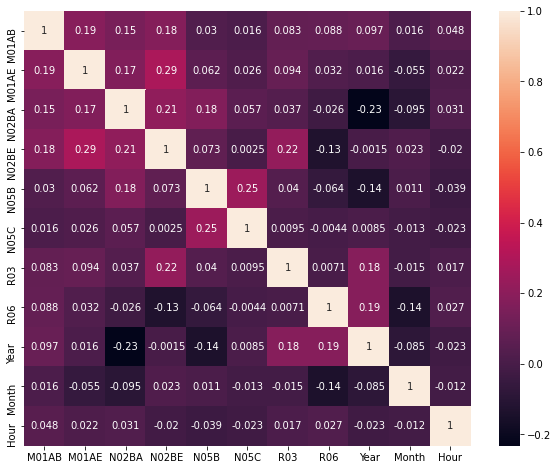

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


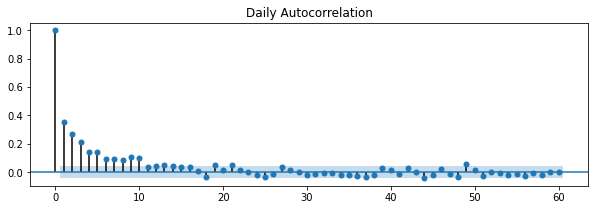

In [12]:
fig, ax1 = plt.subplots(figsize=(10, 3))
#fig, ax2 = plt.subplots(figsize=(10, 3))
daily_autocorr = plot_pacf(data['R06'], lags=60, title='Daily Autocorrelation', ax=ax1)
#monthly_autocorr = plot_pacf(data['R06'].resample('M').sum(), lags=20, title='Monthly Autocorrelation', ax=ax2)

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
def DF_test(data):
  'Prints the Dickey-Fuller test'
  statistics = adfuller(data)
  print('DF Statistic: {}'.format(round(statistics[0], 2)))
  print('p-value: {}'.format(round(statistics[1], 4)))
  print('Critical Values:')
  for key, value in statistics[4].items():
    print('\t{}: {}'.format(key, round(value, 2)))

In [15]:
DF_test(data['R03'])

DF Statistic: -5.13
p-value: 0.0
Critical Values:
	1%: -3.43
	5%: -2.86
	10%: -2.57


In [16]:
DF_test(data['N02BE'])

DF Statistic: -4.19
p-value: 0.0007
Critical Values:
	1%: -3.43
	5%: -2.86
	10%: -2.57


In [17]:
atc_codes = {'Antirheumatic' : ['M01AB','M01AE'],
             'Analgesics' : ['N02BA','N02BE'],
             'Psycholeptics' : ['N05C','N05B'],
             'Airway diseases': ['R03'],
             'Antihistamines': ['R06']}

In [18]:
def create_charts(data, markets, title, index, freq, DF=None):
    
    'Creates line chart with time defined frequency by markets'
    
    fig, ax = plt.subplots(1, 1, sharex=True, figsize=(15,5))
    for codes in markets:
        ax.set_title('{} market'.format(title))
        index = data[codes].resample(freq).sum().index
        plt.plot(index, data[codes].resample(freq).sum())
        plt.legend();

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


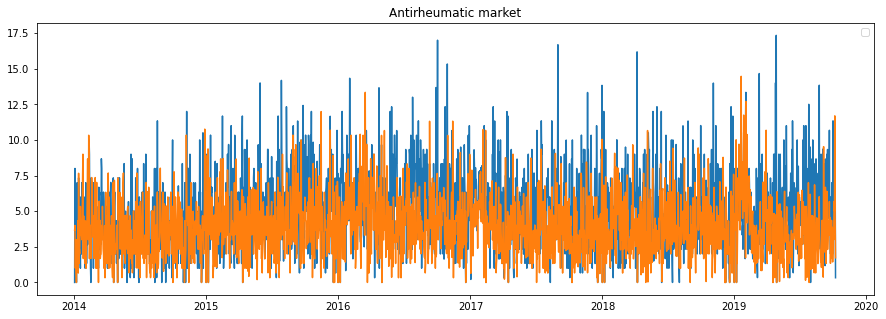

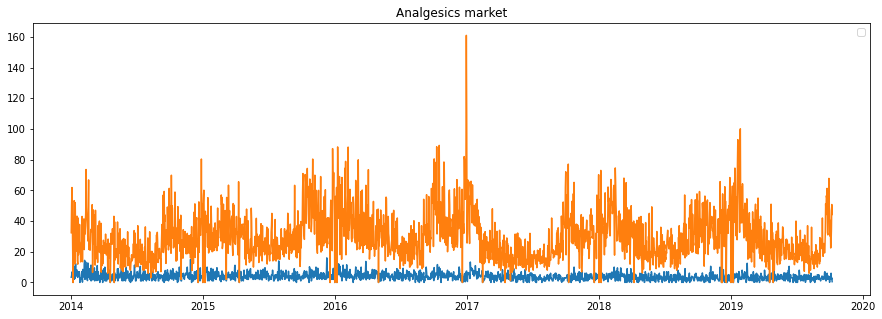

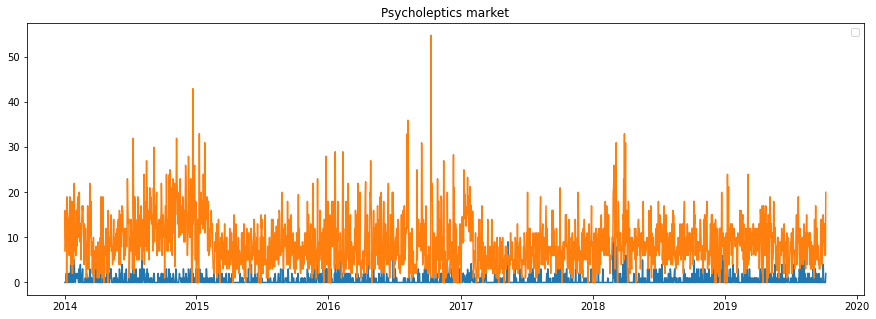

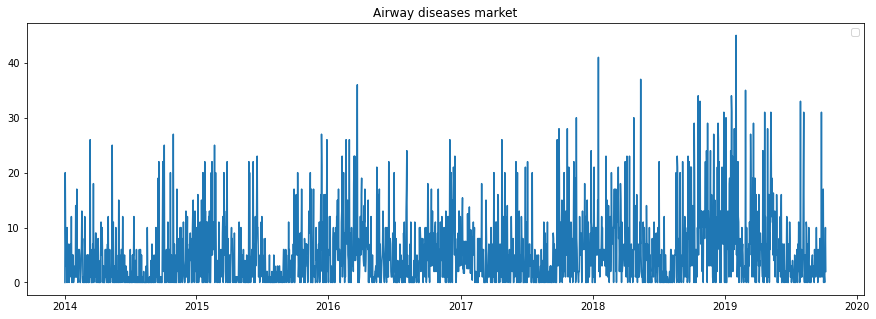

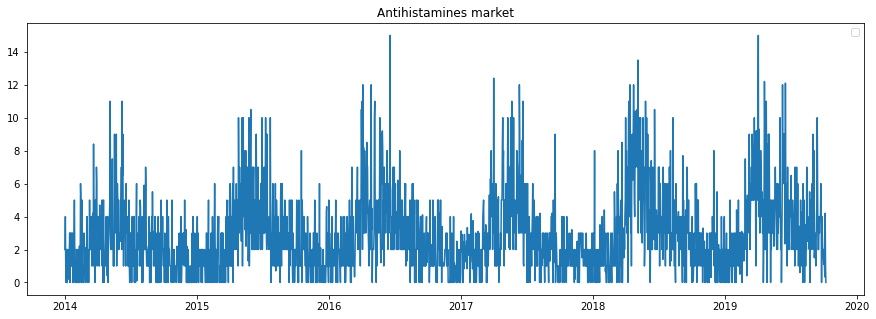

In [20]:
for market in atc_codes.items():
    create_charts(data, market[1], market[0], data.index, 'D', DF=True)

In [21]:
temp = data[atc_codes['Analgesics']]
temp.head()

,N02BA,N02BE
datum,,
2014-01-02,3.4,32.40
2014-01-03,4.4,50.60
2014-01-04,6.5,61.85
2014-01-05,7.0,41.10
2014-01-06,4.5,21.70


In [22]:
temp['volume_sales'] = temp['N02BA'] + temp['N02BE']
temp = temp.drop(columns=['N02BA', 'N02BE'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
temp.shape

(2106, 1)

In [24]:
temp.head()

,volume_sales
datum,
2014-01-02,35.80
2014-01-03,55.00
2014-01-04,68.35
2014-01-05,48.10
2014-01-06,26.20


In [25]:
train_data = temp['01/01/2017':'04/30/2019']
test_data = temp['05/1/2019':]

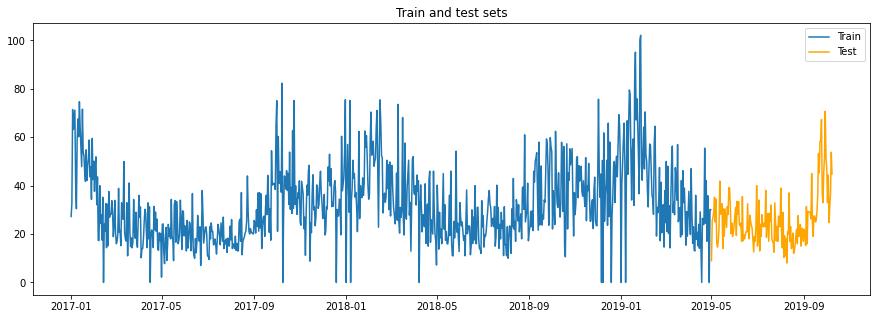

In [26]:
plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['volume_sales'], label='Train')
plt.plot(test_data.index, test_data['volume_sales'], color='orange', label='Test')
plt.legend()
plt.title('Train and test sets')
plt.show()

In [27]:
train_data.shape

(850, 1)

In [28]:
test_data.shape

(161, 1)

In [29]:
train_x = np.reshape(train_data.values, (-1, 1))
test_x = np.reshape(test_data.values, (-1, 1))